<div style = "display: fill;
              border-radius: 50px;
              background-color: blue;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align:center;
                 font-family: Lucida Console;">
        <b>Sales Price Prediction</b>
    </h1>
</div>

<div style="text-align:center;">
    <img src="https://martechseries.com/wp-content/uploads/2019/07/Sales-Hack-How-to-Grow-Business-with-Steady-Sales-Flow-guest-post.jpg" alt="Sales Price" width="700">
</div>

* **What does sales price signifies?**
    * **Definition:** The sales price is the amount of money a buyer pays to acquire a product or service. It is set by the seller and represents the value assigned to the item.
    * **Determining Factors:** Several factors influence the sales price, including production costs, market demand, competition, unique value propositions, economic conditions, and profit goals.
    * **Cost Consideration:** The sales price must cover the costs associated with producing or acquiring the product, as well as provide a margin for profit. Pricing below cost can lead to losses for the seller.
    * **Market Influence:** Market conditions and demand levels play a crucial role in setting the sales price. High demand may allow for higher prices, while low demand may require competitive pricing strategies.
    * **Strategic Importance:** The sales price is a critical component of a business's strategy. It impacts revenue, profit margins, and competitiveness. Well-considered pricing strategies are essential for business success.

<div style = "display: fill;
              border-radius: 50px;
              background-color: blue;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        1. Importing Essential library and Reading the file
    </h1>
</div>


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [2]:
df = pd.read_csv('Advertising.csv',index_col = 'Unnamed: 0')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<div style = "display: fill;
              border-radius: 50px;
              background-color: blue;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2. Exploratory data analysis 
    </h1>
</div>

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2.1 how big is the data?
    </h2>
</div>

 

In [4]:
df.shape

(200, 4)

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2.2 what is the data type of each column?
    </h2>
</div>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2.3 how does the data look like mathematically?
    </h2>
</div>
 

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2.4 check for the null values 
    </h2>
</div>


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2.5 Check for duplicate values 
    </h2>
</div>

In [8]:
df.duplicated().sum()

0

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2.6 Check for Correlation between the columns
    </h2>
</div>

<AxesSubplot:>

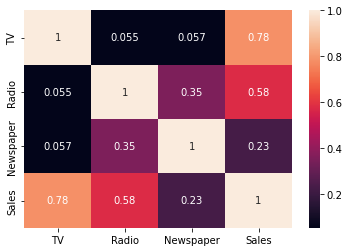

In [9]:
sns.heatmap(df.corr(),annot = True)

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2.7  check for the skewness in the column
    </h2>
</div>


In [10]:
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2.8 Outlier check
    </h2>
</div>


In [11]:
upper = df['Newspaper'].mean() + 3 * df['Newspaper'].std()
lower = df['Newspaper'].mean() - 3 * df['Newspaper'].std()
df[(df['Newspaper'] < lower) | (df['Newspaper'] > upper)]

,TV,Radio,Newspaper,Sales
17,67.8,36.6,114.0,12.5
102,296.4,36.3,100.9,23.8


<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2.8.1 Dealing with the outliers
    </h3>
</div>


In [12]:
df['Newspaper'] = np.where(df['Newspaper'] > upper,
                           upper, 
                           np.where(df['Newspaper'] < lower,
                                    lower,
                                    df['Newspaper']
                                   )
                          )

In [13]:
upper = df['Newspaper'].mean() + 3 * df['Newspaper'].std()
lower = df['Newspaper'].mean() - 3 * df['Newspaper'].std()
df[(df['Newspaper'] < lower) | (df['Newspaper'] > upper)]

,TV,Radio,Newspaper,Sales
17,67.8,36.6,95.889863,12.5
102,296.4,36.3,95.889863,23.8


<div style = "display: fill;
              border-radius: 50px;
              background-color: blue;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        3. Data visualisation
    </h1>
</div>

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        3.1 Univariate Analysis
    </h2>
</div>


<AxesSubplot:>

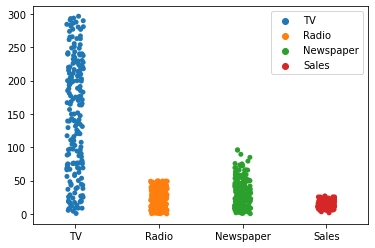

In [14]:
sns.stripplot(df,legend =True)



<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        3.2 Bivariate Analysis
    </h2>
</div>


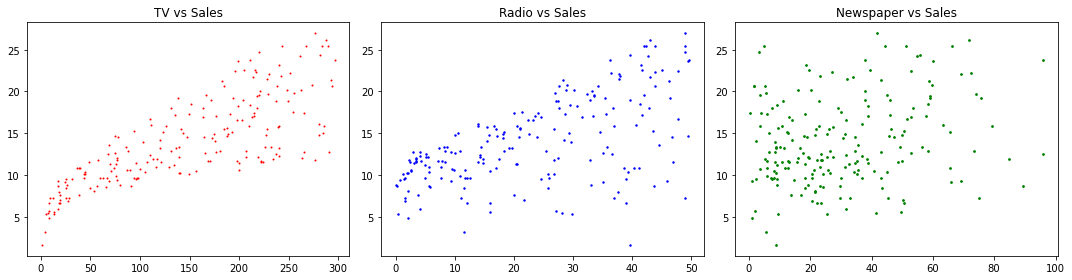

In [15]:
def scatterPlot(col,fig,color):
    plt.subplot(1,3,fig)
    plt.scatter(df[col],df['Sales'],fig,color = color)
    plt.title(col + ' vs Sales')
    
plt.figure(figsize = (15,4))
scatterPlot('TV',1,'Red')
scatterPlot('Radio',2,'Blue')
scatterPlot('Newspaper',3,'green')
plt.tight_layout()
plt.show()

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        3.3  Multivariate Analysis 
    </h2>
</div>



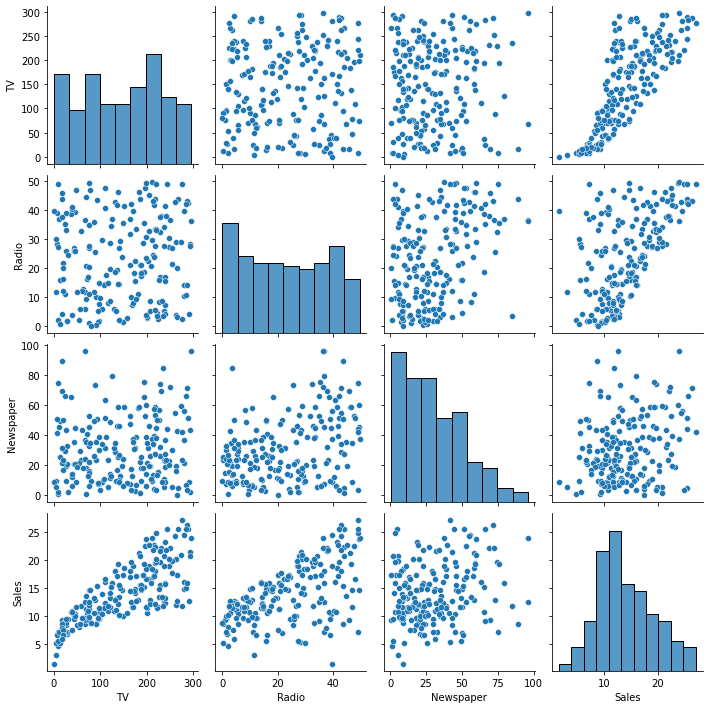

In [16]:
sns.pairplot(df)

<div style = "display: fill;
              border-radius: 50px;
              background-color: blue;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        4. Model Selection, Training and Evaluation 
    </h1>
</div>
<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        4.1 Model Splitting 
    </h2>
</div>


In [17]:
X = df.drop('Sales',axis = 1)
y = df['Sales']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        4.2 Scaling the data 
    </h2>
</div>


In [18]:
scale = MinMaxScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale  = scale.fit_transform(X_test)

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        4.3 Model Selection and Training 
    </h2>
</div>


In [19]:
lr = LinearRegression()
lr.fit(X_train_scale,y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_test_scale)

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        4.4 Model Evaluation
    </h2>
</div>


In [21]:
print('R2 Score                : ',r2_score(y_test,y_pred))
print('Mean Absolute Error     : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error      : ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score                :  0.8383243127950698
Mean Absolute Error     :  1.455821639176917
Mean Squared Error      :  4.451578371500549
Root Mean Squared Error :  2.1098763877299893


<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        4.5 co-efficient and intercept of the model trained 
    </h2>
</div>


In [22]:
lr.coef_

array([12.93558597,  9.51299809, -0.64023363])

In [23]:
lr.intercept_

3.5378912498777026

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        4.6 Model Prediction visualization
    </h2>
</div>


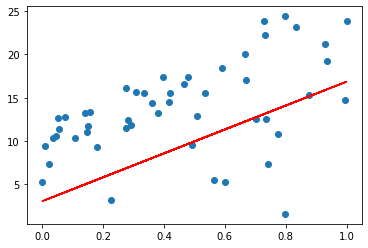

In [24]:
plt.scatter(X_test_scale[:,1],y_test)
plt.plot(X_test_scale[:,1],3.065 + 13.7866*X_test_scale[:,1],color = 'r')
plt.show()